# NAND-gate model

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
x_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]]).float()
y_train = torch.tensor([[1], [1], [1], [0]]).float()

In [9]:
class SigmoidModel:
    def __init__(self):
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def logits(self, x):
        return torch.Tensor(x) @ self.W + self.b

    def f(self, x):
        return torch.sigmoid(self.logits(x))

    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [30]:
model = SigmoidModel()
optimizer = torch.optim.SGD([model.W, model.b], 0.1)

for epoch in range(10000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("W = \t%s\nb = \t%s\nLoss = \t%s" % (model.W, model.b, model.loss(x_train, y_train)))

W = 	tensor([[-7.4109],
        [-7.4109]], requires_grad=True)
b = 	tensor([[11.2890]], requires_grad=True)
Loss = 	tensor(0.0174, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


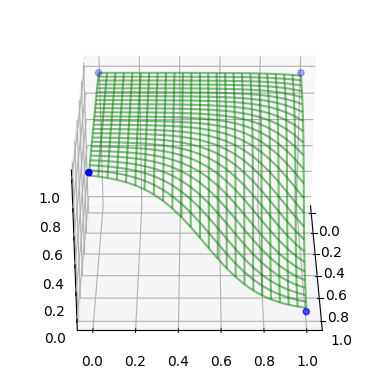

In [31]:
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 25), np.linspace(0, 1, 25))
z_grid = np.empty([25, 25])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), marker='o', color='blue')
 
for i in range(0, x_grid.shape[0]):
    for j in range(0, x_grid.shape[1]):
        z_grid[i, j] = model.f([[x_grid[i, j], y_grid[i, j]]])

ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.50)
ax.view_init(30, 0)
plt.show()
